---
title: "Regression"
---

### Import Libraries

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("../data/processed/cleaned_movies_reg.csv")

In [ ]:
# Encode categorical variables as strings or one-hot later
categorical_cols = ["Age_Rating", "Franchise_Name", "Country", "Language"]

# For now, just keep them as-is or you can choose to encode them later
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define targets
target_revenue = "Revenue_Normalized"
target_rating = "Average_Rating"

# Drop unavailable columns
X = df.drop(columns=[target_revenue, target_rating])  # Keep only usable features

# Select only rows with non-null target
df_rev = df[df[target_revenue].notna()].copy()
df_rat = df[df[target_rating].notna()].copy()

# Define features and targets separately
X_rev = df_rev[X.columns]
y_rev = df_rev[target_revenue]

X_rat = df_rat[X.columns]
y_rat = df_rat[target_rating]


Linear Regression MSE: 39232548724904648.00
Linear Regression R^2: 0.463


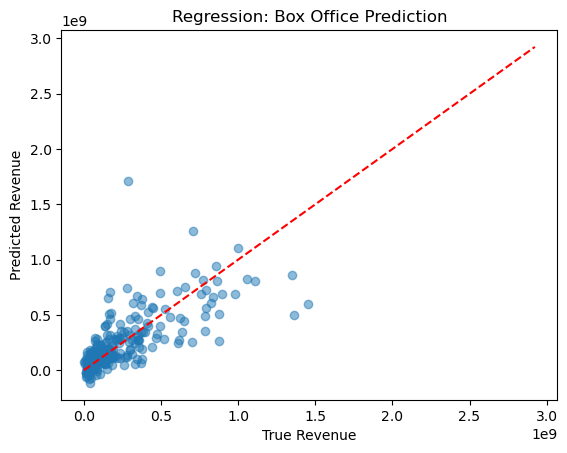

In [11]:

# Drop rows with missing values (or use imputation)
df = df.dropna()

# select only numerical columns for regression
df = df.select_dtypes(include=['number'])

# Define features and target
X = df.drop(columns=["Revenue", "Revenue_Normalized", "Return_On_Investment"])
y = df["Revenue"]

# Optional: scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R^2: {r2:.3f}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Regression: Box Office Prediction")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

KeyError: "['Revenue', 'Revenue_Normalized', 'Return_On_Investment'] not found in axis"